In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator ,img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import Model
from sklearn.metrics import confusion_matrix

In [2]:
train_dir = "/content/drive/My Drive/Colab Notebooks/gender/Training"
val_dir = "/content/drive/My Drive/Colab Notebooks/gender/Validation"

train_dir_male = train_dir + '/male'
train_dir_female = train_dir + '/female'
train_dir_stranger = train_dir + '/stranger'

val_dir_male = val_dir + '/male'
val_dir_female = val_dir + '/female'
val_dir_stranger = val_dir + '/stranger'

In [3]:
print('number of male training images - ', len(os.listdir(train_dir_male)))
print('number of female training images - ', len(os.listdir(train_dir_female)))
print('number of stranger training images - ', len(os.listdir(train_dir_stranger)))

print('----------------------------------------------------------------------')

print('number of male validation  images - ', len(os.listdir(val_dir_male)))
print('number of female validation  images - ', len(os.listdir(val_dir_female)))
print('number of stranger validation  images - ', len(os.listdir(val_dir_stranger)))

number of male training images -  1600
number of female training images -  1600
number of stranger training images -  1600
----------------------------------------------------------------------
number of male validation  images -  400
number of female validation  images -  400
number of stranger validation  images -  400


In [4]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
batch_size = 80

training_data = data_generator.flow_from_directory(directory=train_dir,
                                                   target_size=(64,64),
                                                   class_mode='categorical',
                                                   color_mode='rgb',
                                                   subset='training',
                                                   batch_size=batch_size)

testing_data = data_generator.flow_from_directory(directory=train_dir,
                                                  target_size=(64,64),
                                                  class_mode='categorical',
                                                  color_mode='rgb',
                                                  subset='validation',
                                                  batch_size=batch_size)

validation_data = data_generator.flow_from_directory(directory=val_dir,
                                                     target_size=(64,64),
                                                     class_mode=None,
                                                     color_mode='rgb',
                                                     batch_size=batch_size)

evaluation_generator = data_generator.flow_from_directory(directory=val_dir,
                                                          target_size=(64,64),
                                                          class_mode='categorical',
                                                          color_mode='rgb',
                                                          batch_size=batch_size)

Found 3840 images belonging to 3 classes.
Found 960 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [6]:
set(training_data.classes)

{0, 1, 2}

In [7]:
labels = (testing_data.class_indices)
print(labels)

{'female': 0, 'male': 1, 'stranger': 2}


In [8]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=2, patience=8)

In [9]:
input_model = Input(training_data.image_shape)


model1 = Conv2D(16,(7,7), activation='relu')(input_model)
model1 = Conv2D(32,(6,6), activation='relu', padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = MaxPooling2D((2,2))(model1)
model1 = Conv2D(32,(6,6), activation='relu' ,padding='same')(model1)
model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = AveragePooling2D((2, 2))(model1)
model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
model1 = Conv2D(128,(5,5), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = AveragePooling2D((2, 2))(model1)
model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = MaxPooling2D((2, 2))(model1)
model1 = Conv2D(512,(3,3), activation='relu' ,padding='same')(model1)
model1 = Conv2D(512,(3,3), activation='relu' ,padding='valid')(model1)
model1 = BatchNormalization()(model1)
model1 = Flatten()(model1)
#########################################################                          
model2 = Conv2D(16,(4,4), activation='relu')(input_model)  
model2 = Conv2D(16,(4,4), activation='relu', padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = MaxPooling2D((3, 3))(model2)
model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2) 
model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(256,(1,1), activation='relu' ,padding='same')(model2)
model2 = Conv2D(512,(1,1), activation='relu' ,padding='valid')(model2)
model2 = BatchNormalization()(model2)
model2 = Flatten()(model2)
########################################################
merged = Concatenate()([model1, model2])
merged = Dense(units = 512, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 64, activation = 'relu')(merged)
merged = Dense(units = 32, activation = 'relu')(merged)
merged = Dense(units = 16, activation = 'relu')(merged)
merged = Dense(units = 8, activation = 'relu')(merged)
merged = Dense(units = 4, activation = 'relu')(merged)
output = Dense(activation = 'softmax', units = 3)(merged)

model = Model(inputs= [input_model], outputs=[output])

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 61, 61, 16)   784         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 61, 61, 16)   4112        conv2d_10[0][0]                  
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 61, 61, 16)   64          conv2d_11[0][0]                  
_______________________________________________________________________________________

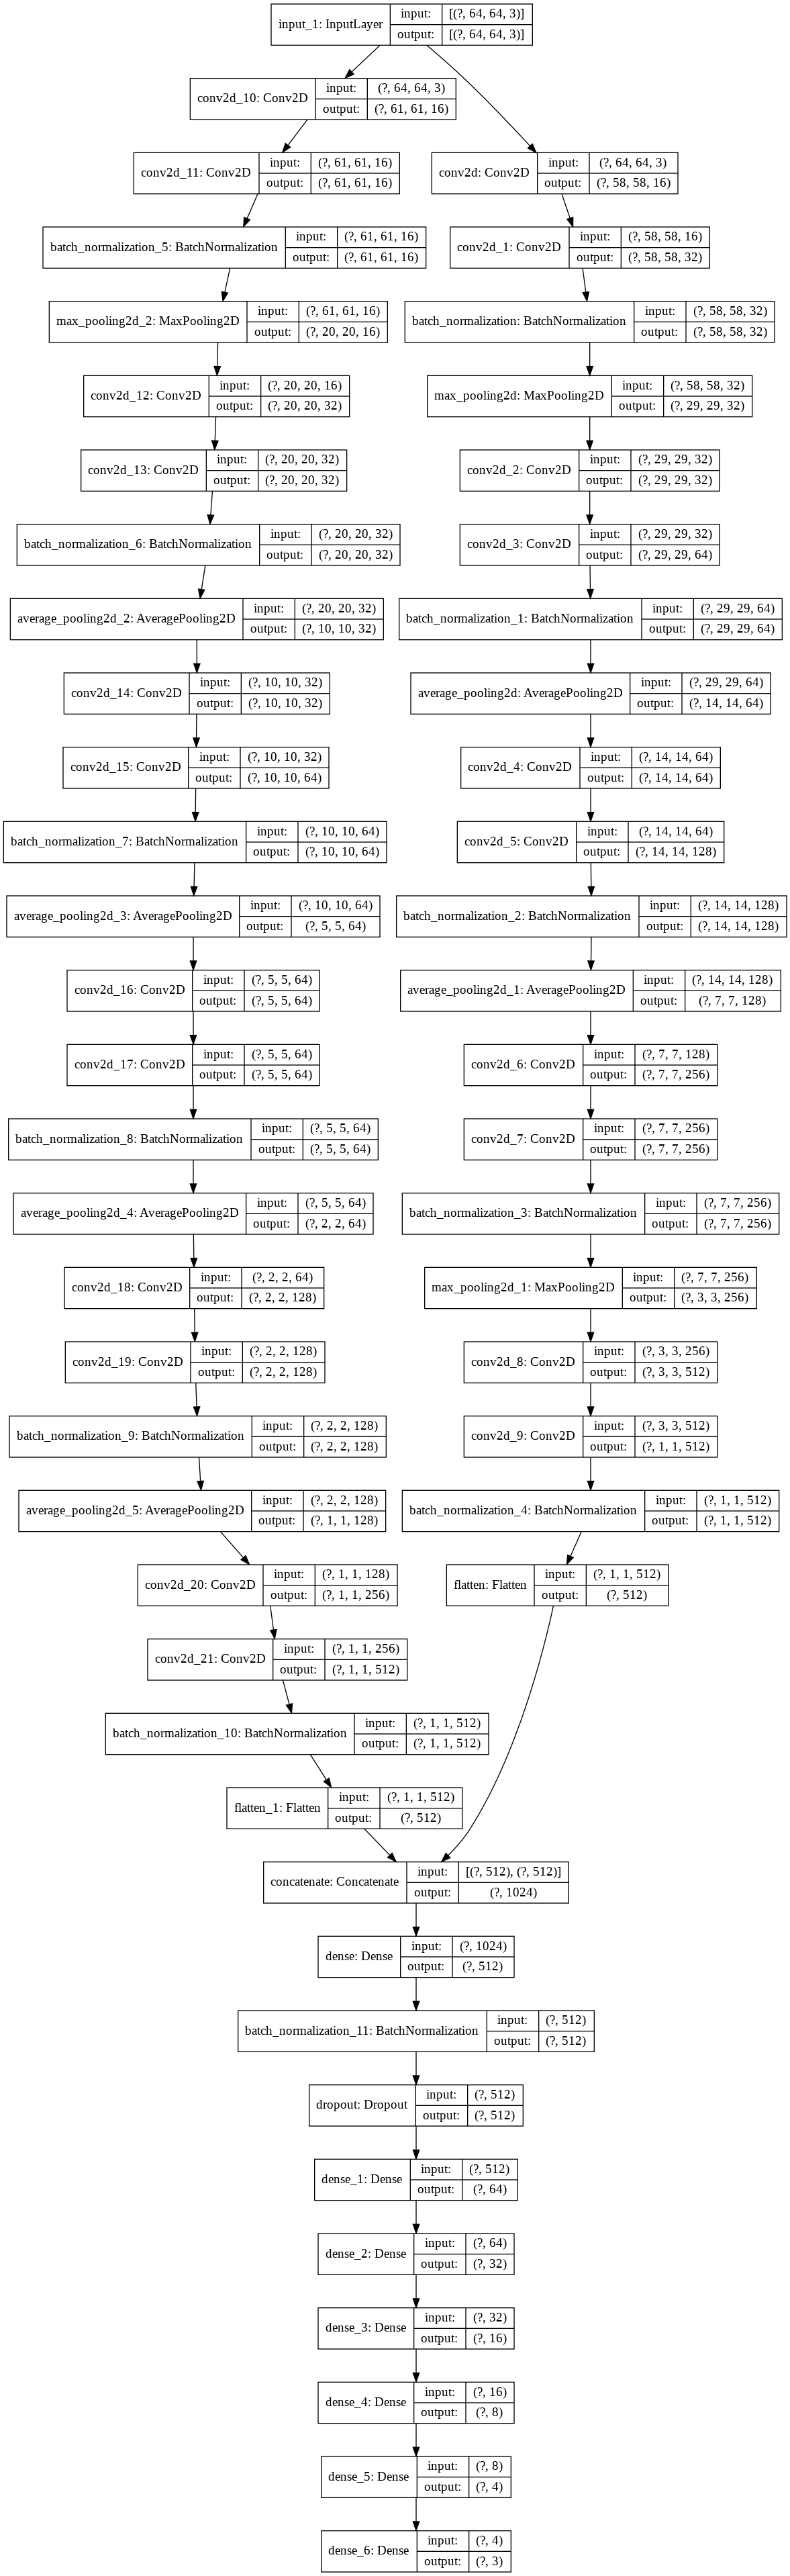

In [12]:
plot_model(model, show_shapes=True)

In [13]:
history = model.fit_generator(generator=training_data,
                              epochs=20,
                              validation_data=testing_data,
                              callbacks=[es],
                              verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
36/48 [=====================>........] - ETA: 9:49 - loss: 0.8079 - accuracy: 0.6274 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


48/48 [==============================] - 3094s 64s/step - loss: 0.8070 - accuracy: 0.6286 - val_loss: 1.0266 - val_accuracy: 0.4510
Epoch 2/20
48/48 [==============================] - 11s 236ms/step - loss: 0.7251 - accuracy: 0.7130 - val_loss: 1.2393 - val_accuracy: 0.5396
Epoch 3/20
48/48 [==============================] - 11s 235ms/step - loss: 0.6136 - accuracy: 0.8133 - val_loss: 17.0713 - val_accuracy: 0.3365
Epoch 4/20
48/48 [==============================] - 11s 236ms/step - loss: 0.4732 - accuracy: 0.9055 - val_loss: 1.2082 - val_accuracy: 0.5969
Epoch 5/20
48/48 [==============================] - 12s 240ms/step - loss: 0.4120 - accuracy: 0.9362 - val_loss: 0.8246 - val_accuracy: 0.5865
Epoch 6/20
48/48 [==============================] - 12s 241ms/step - loss: 0.3724 - accuracy: 0.9477 - val_loss: 0.7703 - val_accuracy: 0.6260
Epoch 7/20
48/48 [==============================] - 11s 236ms/step - loss: 0.3295 - accuracy: 0.9604 - val_loss: 0.8961 - val_accuracy: 0.6125
Epoch 8/2

In [14]:
model.save_weights('weights.h5')

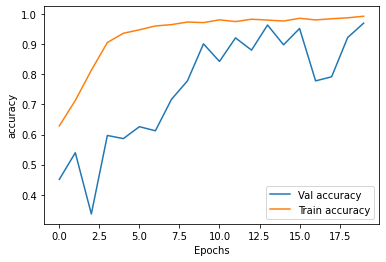

In [15]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig('plot_accuracy.png')
plt.show()

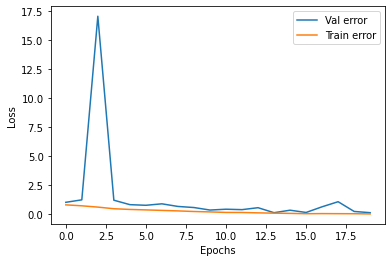

In [16]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

In [17]:
#evaluate the model
scores = model.evaluate_generator(evaluation_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.

accuracy: 95.83%


In [18]:
pred = model.predict_generator(validation_data)
print(pred.shape)

Instructions for updating:
Please use Model.predict, which supports generators.
(1200, 3)


In [19]:
pred = pred.reshape(3,pred.shape[0])
predicted_class_indices= np.round_(pred)
labels = (validation_data.class_indices)
print(predicted_class_indices)
print (labels)

[[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
{'female': 0, 'male': 1, 'stranger': 2}


In [20]:
true_labels = []
perdict_labels = predicted_class_indices[0]

for i in range(len(glob.glob(val_dir_female +'/*'))):
    true_labels.append(0)
for i in range(len(glob.glob(val_dir_male +'/*'))):
    true_labels.append(1)
for i in range(len(glob.glob(val_dir_stranger +'/*'))):
    true_labels.append(2)

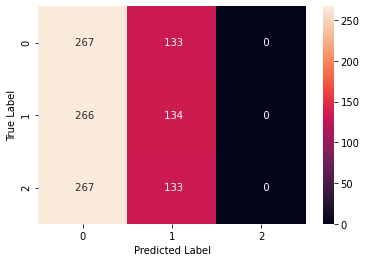

<Figure size 432x288 with 0 Axes>

In [21]:
cm = confusion_matrix(true_labels, perdict_labels)
sns.heatmap(cm, fmt='4',annot=True).set(ylabel="True Label", xlabel="Predicted Label")
plt.show()
plt.savefig('confusion_matrix.jpg')

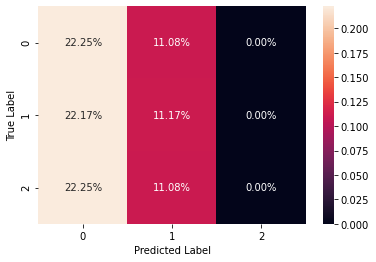

<Figure size 432x288 with 0 Axes>

In [22]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%').set(ylabel="True Label", xlabel="Predicted Label")
plt.show()
plt.savefig('confusion_matrix_percentage.jpg')

True Label female - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


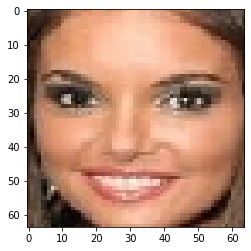

True Label female - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


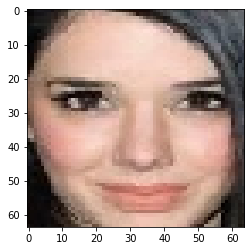

True Label female - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


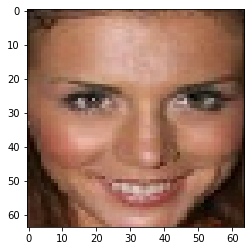

True Label female - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


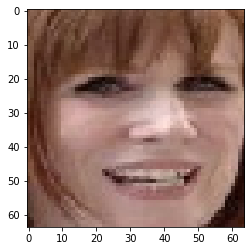

True Label female - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


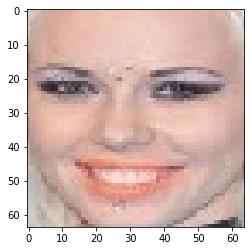

True Label female - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


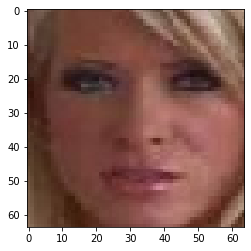

True Label female - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


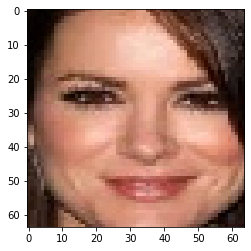

True Label female - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


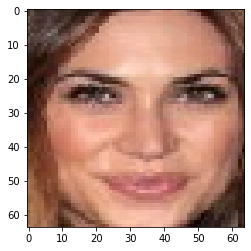

True Label female - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


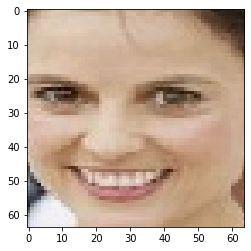

True Label female - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


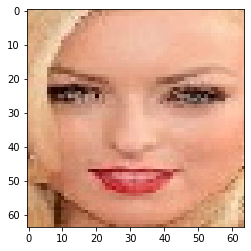

In [23]:
paths = glob.glob(val_dir_female +'/*')

for i in range(0,10):
    test_image = image.load_img(paths[i], target_size = (64, 64))
    plt.imshow(test_image)
    if predicted_class_indices[0][i] == 0:
        pred_label = 'female'
    elif predicted_class_indices[0][i] == 1:
        pred_label = 'male'
    else:
        pred_label = 'stranger'
    
    print('True Label female - Perdict Label : {}'.format(pred_label))
    labels = (training_data.class_indices)
    print(labels)
    plt.show()

True Label male - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


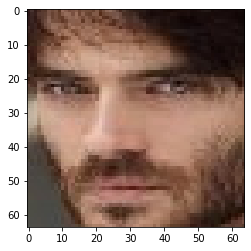

True Label male - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


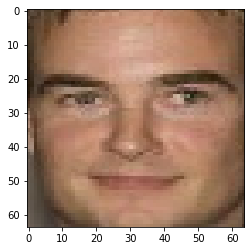

True Label male - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


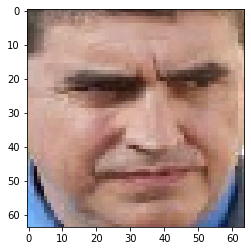

True Label male - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


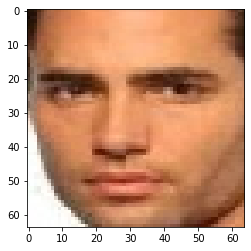

True Label male - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


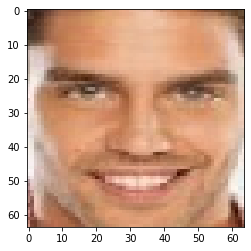

True Label male - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


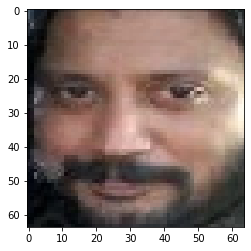

True Label male - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


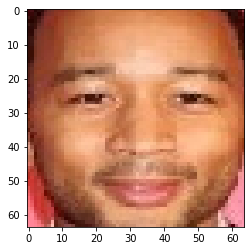

True Label male - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


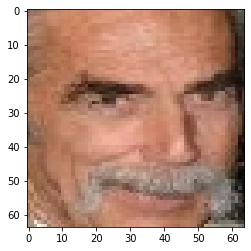

True Label male - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


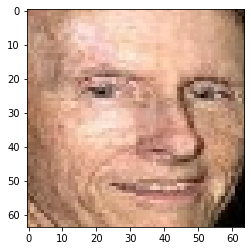

True Label male - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


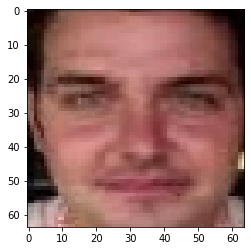

In [24]:
paths = glob.glob(val_dir_male +'/*')
l = len(glob.glob(val_dir_female +'/*'))

for i in range(0,10):
    test_image = image.load_img(paths[i], target_size = (64, 64))
    plt.imshow(test_image)
    if predicted_class_indices[0][l+i] == 0:
        pred_label = 'female'
    elif predicted_class_indices[0][l+i] == 1:
        pred_label = 'male'
    else:
        pred_label = 'stranger'
    
    print('True Label male - Perdict Label : {}'.format(pred_label))
    labels = (training_data.class_indices)
    print (labels)
    plt.show()

True Label stranger - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


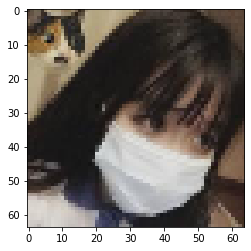

True Label stranger - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


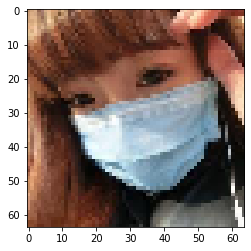

True Label stranger - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


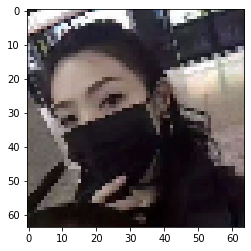

True Label stranger - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


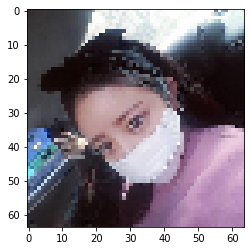

True Label stranger - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


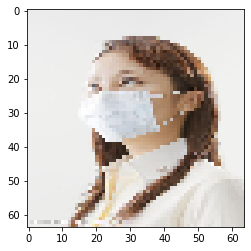

True Label stranger - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


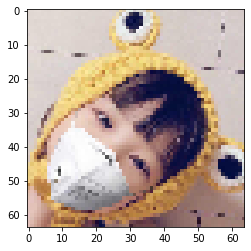

True Label stranger - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


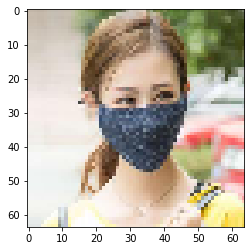

True Label stranger - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


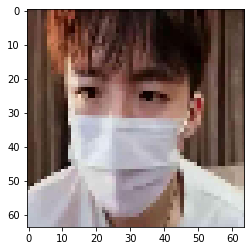

True Label stranger - Perdict Label : female
{'female': 0, 'male': 1, 'stranger': 2}


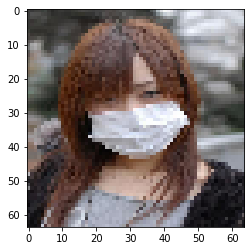

True Label stranger - Perdict Label : male
{'female': 0, 'male': 1, 'stranger': 2}


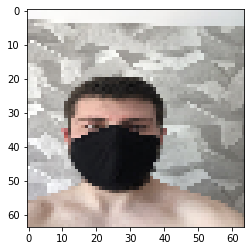

In [25]:
paths = glob.glob(val_dir_stranger +'/*')
l = len(glob.glob(val_dir_male +'/*'))

for i in range(0,10):
    test_image = image.load_img(paths[i], target_size = (64, 64))
    plt.imshow(test_image)
    if predicted_class_indices[0][l+i] == 0:
        pred_label = 'female'
    elif predicted_class_indices[0][l+i] == 1:
        pred_label = 'male'
    else:
        pred_label = 'stranger'
    
    print('True Label stranger - Perdict Label : {}'.format(pred_label))
    labels = (training_data.class_indices)
    print (labels)
    plt.show()

In [26]:
# 모델 저장하기
from keras.models import load_model
model.save('my_model.h5')